## Goal: parse the Ehux significantly regulated genes as per RSEM

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import glob
import palettable as pal
import numpy as np
import cPickle as cpk
from itertools import combinations
import numpy as np
from matplotlib import colors

mpl.rcParams['pdf.fonttype']=42
mpl.rcParams['font.sans-serif']='Arial'
%matplotlib inline


In [2]:
gFHash=cpk.load(open('../orthoMCL_output/Ehux_Dictionary.pickle', 'r'))
    

In [3]:
OG_to_Gene_Dict=cpk.load(open('../orthoMCL_output/Ehux_Dictionary.pickle', 'r'))

In [4]:
Hist_PD=pd.DataFrame(index=gFHash.keys(),columns=['NumGenes', 'Emi374', 'Emi379', 'Emi370', 'Emi219', 'Emihu1'])
Hist_PD=Hist_PD.fillna(0)
for i,key in enumerate(gFHash):
#     if i==100:
#         break
    l=len(gFHash[key])
    Hist_PD.loc[key, 'NumGenes']=l
    for transcript in gFHash[key]:
        org=transcript.split('|')[0]
        Hist_PD.loc[key,org]+=1

GenesInOrg={}
GenesInOrg['Emi219']=Hist_PD[Hist_PD.Emi219>0].index
GenesInOrg['Emi379']=Hist_PD[Hist_PD.Emi379>0].index
GenesInOrg['Emi370']=Hist_PD[Hist_PD.Emi370>0].index
GenesInOrg['Emi374']=Hist_PD[Hist_PD.Emi374>0].index
GenesInOrg['Emihu1']=Hist_PD[Hist_PD.Emihu1>0].index
def Calculate_Venn_comparison(hash):
        #input = a Hash of the form hash[Organism]=list of orthologus groups
        #Outputs a hash of the form key = all the variations of thes sets : list of orthologus genes in an inclusive way
        #It is inclusive so the set containing A uniq genes is going to contain all the genes for an org
        variations={}
        for i in range(len(hash)):
            for v in combinations(hash.keys(), i+1):
                vsets = [hash[x] for x in v]
                variations[tuple(sorted(v))]=reduce(lambda x,y: x.intersection(y), vsets)
        return variations
    
def GetDifference_Venn(variations):
    #Function takes the input from the above function and outputs a hash of the same format but 
    #each set is uniqe: e.g. there are no repeats of orthologus groups across sets. 
    outdict={}
    vkeys=variations.keys()
    #loop over each of the variable cases
    for v in variations:
        #create a set to do the comparisons
        vset=set(v)
        vdata_set=set(variations[v])
        #loop over all other variations
        for j in variations:
            #if v is a subset of jset we want to remove the items of jset from v set
            jdata_set=set(variations[j])
            jset=set(j)
            if vset.issubset(jset):
                if vset==jset:
                    pass
                else: 
                    newdata=vdata_set-jdata_set
                    vdata_set=newdata
        outdict[v]=vdata_set
    return outdict

#Get the genes that are unique with in the venn: format of the hash = name of the subset : Orthologus gene groups
Genes_In_Each_Cat=Calculate_Venn_comparison(GenesInOrg)
Genes_Uniq_Venn=GetDifference_Venn(Genes_In_Each_Cat)

## Import the RSEM files for gene and isoform data

In [5]:
##Import the RSEM Files for gene families
files=glob.glob("edgeR.18185.dir/*DE_results")
RSEM_Gene_Hash={}
for f in files:
    name=f.split('.')[5]
    out=pd.read_table(f)
    RSEM_Gene_Hash[name]=out

In [6]:
files=glob.glob("edgeR.18268.dir/*DE_results")
RSEM_Isoform_Hash={}
for f in files:
    name=f.split('.')[5]
    out=pd.read_table(f)
    RSEM_Isoform_Hash[name]=out

In [7]:
RSEM_Isoform_Hash['Q_con_vs_R_PlusN']

logFC     logCPM        PValue           FDR
Emihu1|79084             -12.675156  13.385938  2.921392e-17  2.081053e-12
Emi370|CAMPEP_0187711222 -13.232739   9.233428  1.547082e-12  5.510321e-08
Emi370|CAMPEP_0187711574  12.276359   8.304311  7.523978e-10  1.786569e-05
Emi370|CAMPEP_0187711614  11.810624   7.847344  3.938249e-09  7.013530e-05
Emihu1|434417             11.358933   7.407022  1.386889e-08  1.975901e-04
Emihu1|79617              -6.805823   7.204446  2.001598e-08  2.247530e-04
Emi374|CAMPEP_0187606548  11.356965   7.405175  2.208565e-08  2.247530e-04
Emi379|CAMPEP_0187653602  11.188026   7.241295  4.363690e-08  3.885593e-04
Emi374|CAMPEP_0187598980  10.914963   6.977923  7.151557e-08  4.868513e-04
Emi379|CAMPEP_0187637972  11.050669   7.108566  7.249465e-08  4.868513e-04
Emi370|CAMPEP_0187665026  -6.373810   7.545694  7.517883e-08  4.868513e-04
Emi379|CAMPEP_0187627646  11.008448   7.067838  9.362188e-08  5.358644e-04
Emi379|CAMPEP_0187625908  -6.231652   6.693453  9.779234e-08  5.358644e-04
Emi374|CAMPEP_0187589848  10.796125   6.863793  1.106983e-07  5.632567e-04
Emi219|CAMPEP_0187754174   5.764105   8.491854  1.221244e-07  5.799689e-04
Emihu1|432295              5.603173   9.227393  1.949017e-07  8.108896e-04
Emi370|CAMPEP_0187725102  -5.119962   9.721555  1.978155e-07  8.108896e-04
Emi379|CAMPEP_0187639788  10.751093   6.820721  2.119472e-07  8.108896e-04
Emihu1|77663              -6.237431  13.004339  2.201324e-07  8.108896e-04
Emi374|CAMPEP_0187582132  10.611902   6.687546  2.276660e-07  8.108896e-04
Emi379|CAMPEP_0187612996  -5.060158   9.775155  2.640175e-07  8.955849e-04
Emi370|CAMPEP_0187678562  10.571621   6.649119  2.845992e-07  9.215191e-04
Emi370|CAMPEP_0187688858  -6.580807   6.194318  3.262775e-07  9.906915e-04
Emi219|CAMPEP_0187802010  10.532832   6.612170  3.337769e-07  9.906915e-04
Emi219|CAMPEP_0187750264  -6.607350  13.720508  3.540015e-07  1.008692e-03
Emi374|CAMPEP_0187580668   5.073601  10.147397  3.998521e-07  1.095518e-03
Emi219|CAMPEP_0187787140  10.420773   6.505730  4.388627e-07  1.157866e-03
Emi370|CAMPEP_0187667050  -5.119378   7.717589  4.646505e-07  1.182121e-03
Emi219|CAMPEP_0187780302  -5.207370  10.862792  5.561144e-07  1.366028e-03
Emi370|CAMPEP_0187666202  10.559837   6.637786  5.990516e-07  1.422448e-03
...                             ...        ...           ...           ...
Emi379|CAMPEP_0187657470  -0.003729   2.623486  1.000000e+00  1.000000e+00
Emihu1|435229             -0.003728   2.623486  1.000000e+00  1.000000e+00
Emi219|CAMPEP_0187801670  -0.003681   2.649499  1.000000e+00  1.000000e+00
Emi379|CAMPEP_0187629380  -0.003681   2.649499  1.000000e+00  1.000000e+00
Emi379|CAMPEP_0187613546  -0.003679   2.649499  1.000000e+00  1.000000e+00
Emi219|CAMPEP_0187740780   0.002408   5.257939  1.000000e+00  1.000000e+00
Emi219|CAMPEP_0187762246  -0.002277   2.655325  1.000000e+00  1.000000e+00
Emi219|CAMPEP_0187743676   0.001633   2.653296  1.000000e+00  1.000000e+00
Emi219|CAMPEP_0187742302   0.001383   2.682804  1.000000e+00  1.000000e+00
Emi379|CAMPEP_0187654848  -0.001140   3.066883  1.000000e+00  1.000000e+00
Emi370|CAMPEP_0187667702   0.000972   3.039629  1.000000e+00  1.000000e+00
Emi219|CAMPEP_0187757390   0.000969   3.039629  1.000000e+00  1.000000e+00
Emi379|CAMPEP_0187630228   0.000792   2.064280  1.000000e+00  1.000000e+00
Emi379|CAMPEP_0187627576   0.000787   2.064280  1.000000e+00  1.000000e+00
Emihu1|219066              0.000782   2.064280  1.000000e+00  1.000000e+00
Emi379|CAMPEP_0187654784   0.000776   2.064280  1.000000e+00  1.000000e+00
Emi219|CAMPEP_0187804804   0.000771   2.064280  1.000000e+00  1.000000e+00
Emi379|CAMPEP_0187650088   0.000766   2.064280  1.000000e+00  1.000000e+00
Emi379|CAMPEP_0187637326   0.000760   2.064280  1.000000e+00  1.000000e+00
Emi379|CAMPEP_0187656392   0.000755   2.064280  1.000000e+00  1.000000e+00
Emihu1|111673              0.000749   2.064280  1.000000e+00  1.000000e+00
Emi379|CAMPEP_0187652766   0.000744   2.064280  1.00000

In [8]:
RSEM_Gene_Stats=pd.DataFrame(index=RSEM_Gene_Hash.keys(), columns=['Total', 'DE'])
for key in RSEM_Gene_Hash.keys():
    total=len(RSEM_Gene_Hash[key])
    DE=len(RSEM_Gene_Hash[key][RSEM_Gene_Hash[key]['FDR']<0.05])
    RSEM_Gene_Stats.loc[key,:]=[total, DE]

In [9]:
RSEM_Isoform_Stats=pd.DataFrame(index=RSEM_Isoform_Hash.keys(), columns=['Total', 'DE'])
for key in RSEM_Isoform_Hash.keys():
    total=len(RSEM_Isoform_Hash[key])
    DE=len(RSEM_Isoform_Hash[key][RSEM_Isoform_Hash[key]['FDR']<0.05])
    RSEM_Isoform_Stats.loc[key,:]=[total, DE]

(0, 2000)

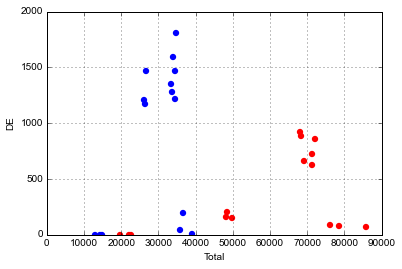

In [10]:
RSEM_Gene_Stats['DE']/RSEM_Gene_Stats['Total']
fig,ax=plt.subplots(1)
RSEM_Gene_Stats.plot(kind='scatter', x='Total', y='DE', ax=ax, lw=0, s=40)
RSEM_Isoform_Stats.plot(kind='scatter', x='Total', y='DE', ax=ax, c='r',lw=0, s=40)
ax.set_ylim([0,2000])
### LOoks like the plots cluster together based on what is being compared!  Prettttttyy cool. 

In [11]:
len(RSEM_Gene_Hash['Q_con_vs_R_PlusN'])

34362

Q_con_vs_T_MinusN
Q_con_vs_V_MinusP
Q_con_vs_R_PlusN
Q_con_vs_S_PlusP
Q_con_vs_X_PlusDSW


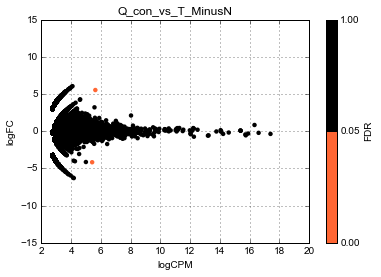

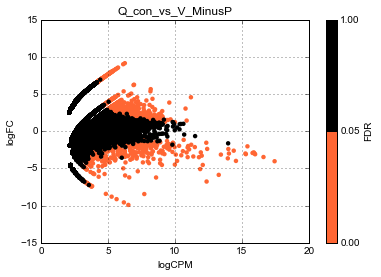

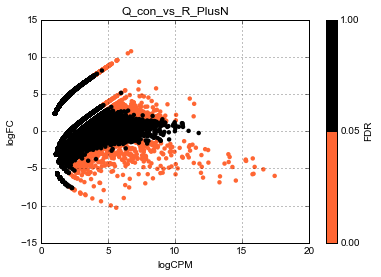

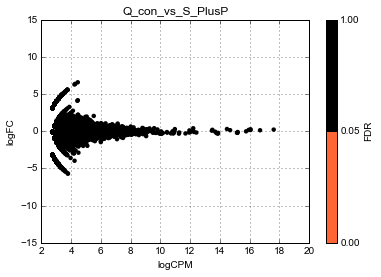

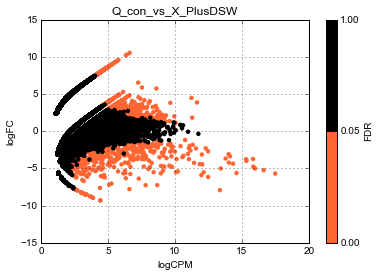

In [12]:
##Plot genes that are significant based on 0.05 FDR in comparisons with Q

cmap = plt.cm.gray_r
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = (1,.4,.2,1.0)
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
bounds = (0,0.05,1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


for key in RSEM_Gene_Hash.keys():
    if 'Q' in key:
        ax=RSEM_Gene_Hash[key].plot(kind='scatter', x='logCPM', y='logFC',c='FDR',cmap=cmap, norm=norm, lw=0, ylim=[-15,15])
        
        ax.set_title(key)

        print(key)

Q_con_vs_T_MinusN
Q_con_vs_V_MinusP
Q_con_vs_R_PlusN
Q_con_vs_S_PlusP
Q_con_vs_X_PlusDSW


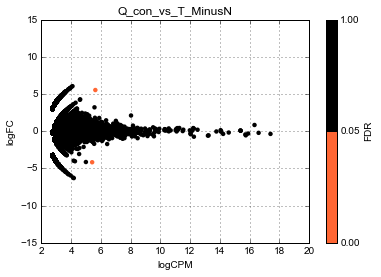

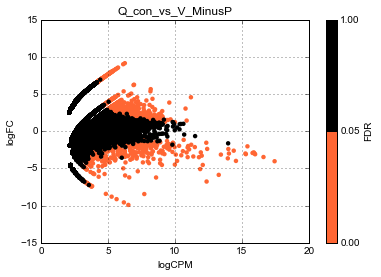

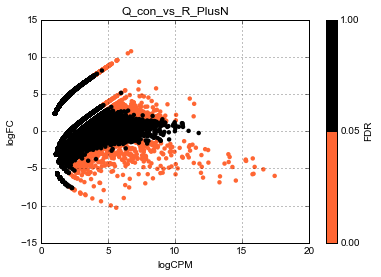

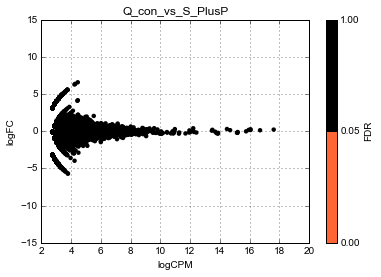

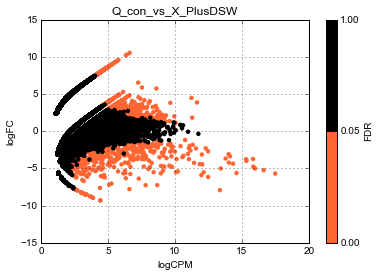

In [13]:
##Plot genes that are significant based on 0.05 FDR in comparisons with Q

cmap = plt.cm.gray_r
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = (1,.4,.2,1.0)
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
bounds = (0,0.05,1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


for key in RSEM_Isoform_Hash.keys():
    if 'Q' in key:
        ax=RSEM_Gene_Hash[key].plot(kind='scatter', x='logCPM', y='logFC',c='FDR',cmap=cmap, norm=norm, lw=0, ylim=[-15,15])
        
        ax.set_title(key)

        print(key)

In [14]:
def Comp_OG_Iso_Sig(geneSet):
    #Function to compare core genes for Ehux OGs and Isoforms significance of regulation
    OG_RSEM=RSEM_Gene_Hash[geneSet]
    Iso_RSEM=RSEM_Isoform_Hash[geneSet]
    #first look at core genes
    outDF=pd.DataFrame(columns=['OG', 'Emihu1','Emi219', 'Emi370', 'Emi374', 'Emi379'], index=OG_RSEM.index)
    for OG in Genes_In_Each_Cat[('Emi219', 'Emi370', 'Emi374', 'Emi379', 'Emihu1')]:
        IsoList=gFHash[OG]
        if OG in OG_RSEM.index:
            OG_Sig=(OG_RSEM.loc[OG].FDR < 0.05)
            if OG_Sig: 
                OG_UpDn=np.sign(OG_RSEM.loc[OG].logFC)
            else:
                OG_UpDn=0
            outDF.loc[OG, 'OG']=OG_UpDn
            for iso in IsoList:
                specName=iso.split("|")[0]
                if iso in Iso_RSEM.index:
                    Iso_Sig=(Iso_RSEM.loc[iso].FDR < 0.05)
                    if Iso_Sig: 
                        Iso_UpDn=np.sign(Iso_RSEM.loc[iso].logFC)
                    else:
                        Iso_UpDn=0
                    if outDF.loc[OG,specName]!=1|-1:
                        outDF.loc[OG, specName]=Iso_UpDn
    return outDF


                    
QvR_Comp_Core=Comp_OG_Iso_Sig('Q_con_vs_R_PlusN')
QvV_Comp_Core=Comp_OG_Iso_Sig('Q_con_vs_V_MinusP')
QvX_Comp_Core=Comp_OG_Iso_Sig('Q_con_vs_X_PlusDSW')

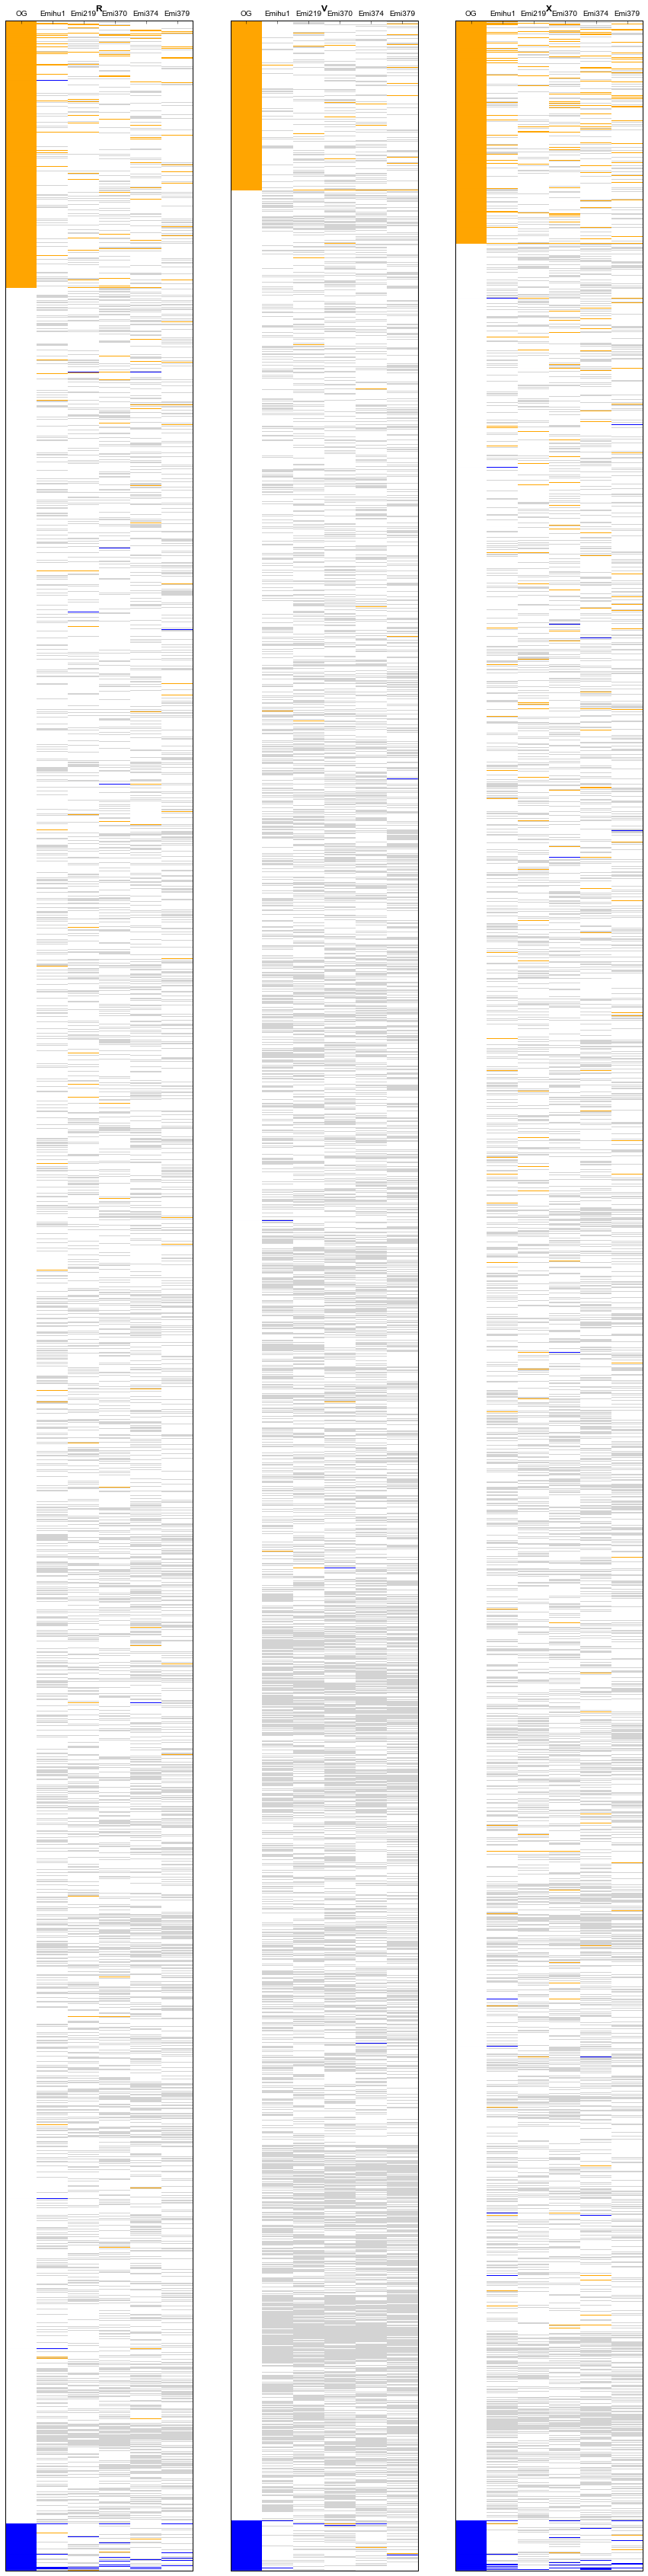

In [15]:
def PlotComparison(ComparisonOGIsoSig,ax):
    df=ComparisonOGIsoSig.dropna(how='all').sort('OG', ascending=False)
    df=df.fillna(-2)
    ax.margins(0,0)
    cmap = colors.ListedColormap(['lightgrey', 'blue', 'white', 'orange'])
    ax.imshow(df, interpolation='none', aspect='auto', origin='upper', cmap=cmap, vmin=-2, vmax=1)
    ax.set_xticks(np.arange(0, len(df.columns), 1))
    ax.set_xticklabels(df.columns, rotation=90)
    ax.xaxis.set_ticks_position('top')
    ax.set_yticks([])
    return df

fig, ax=plt.subplots(1,3)
fig.set_size_inches(15, 3000/50)
PlotComparison(QvR_Comp_Core, ax[0])
PlotComparison(QvV_Comp_Core, ax[1])
PlotComparison(QvX_Comp_Core, ax[2])
ax[0].set_title('R', y=1.002,weight='bold')
ax[1].set_title('V',y=1.002, weight='bold')
ax[2].set_title('X',y=1.002, weight='bold')



In [17]:
def Comp_OG_Iso_Sig(geneSet):
    #Function to compare core genes for Ehux OGs and Isoforms significance of regulation
    OG_RSEM=RSEM_Gene_Hash[geneSet]
    Iso_RSEM=RSEM_Isoform_Hash[geneSet]
    #first look at core genes
    outDF=pd.DataFrame(columns=['OG', 'Emihu1','Emi219', 'Emi370', 'Emi374', 'Emi379'], index=OG_RSEM.index)
    for OG in OG_RSEM.index:
        IsoList=gFHash[OG]
        OG_Sig=(OG_RSEM.loc[OG].FDR < 0.05)
        if OG_Sig: 
            OG_UpDn=np.sign(OG_RSEM.loc[OG].logFC)
        else:
            OG_UpDn=0
        outDF.loc[OG, 'OG']=OG_UpDn
        for iso in IsoList:
            specName=iso.split("|")[0]
            if iso in Iso_RSEM.index:
                Iso_Sig=(Iso_RSEM.loc[iso].FDR < 0.05)
                if Iso_Sig: 
                    Iso_UpDn=np.sign(Iso_RSEM.loc[iso].logFC)
                else:
                    Iso_UpDn=0
                if outDF.loc[OG,specName]!=1|-1:
                    outDF.loc[OG, specName]=Iso_UpDn
    return outDF


                    
QvR_Comp_all=Comp_OG_Iso_Sig('Q_con_vs_R_PlusN')
QvV_Comp_all=Comp_OG_Iso_Sig('Q_con_vs_V_MinusP')
QvX_Comp_all=Comp_OG_Iso_Sig('Q_con_vs_X_PlusDSW')

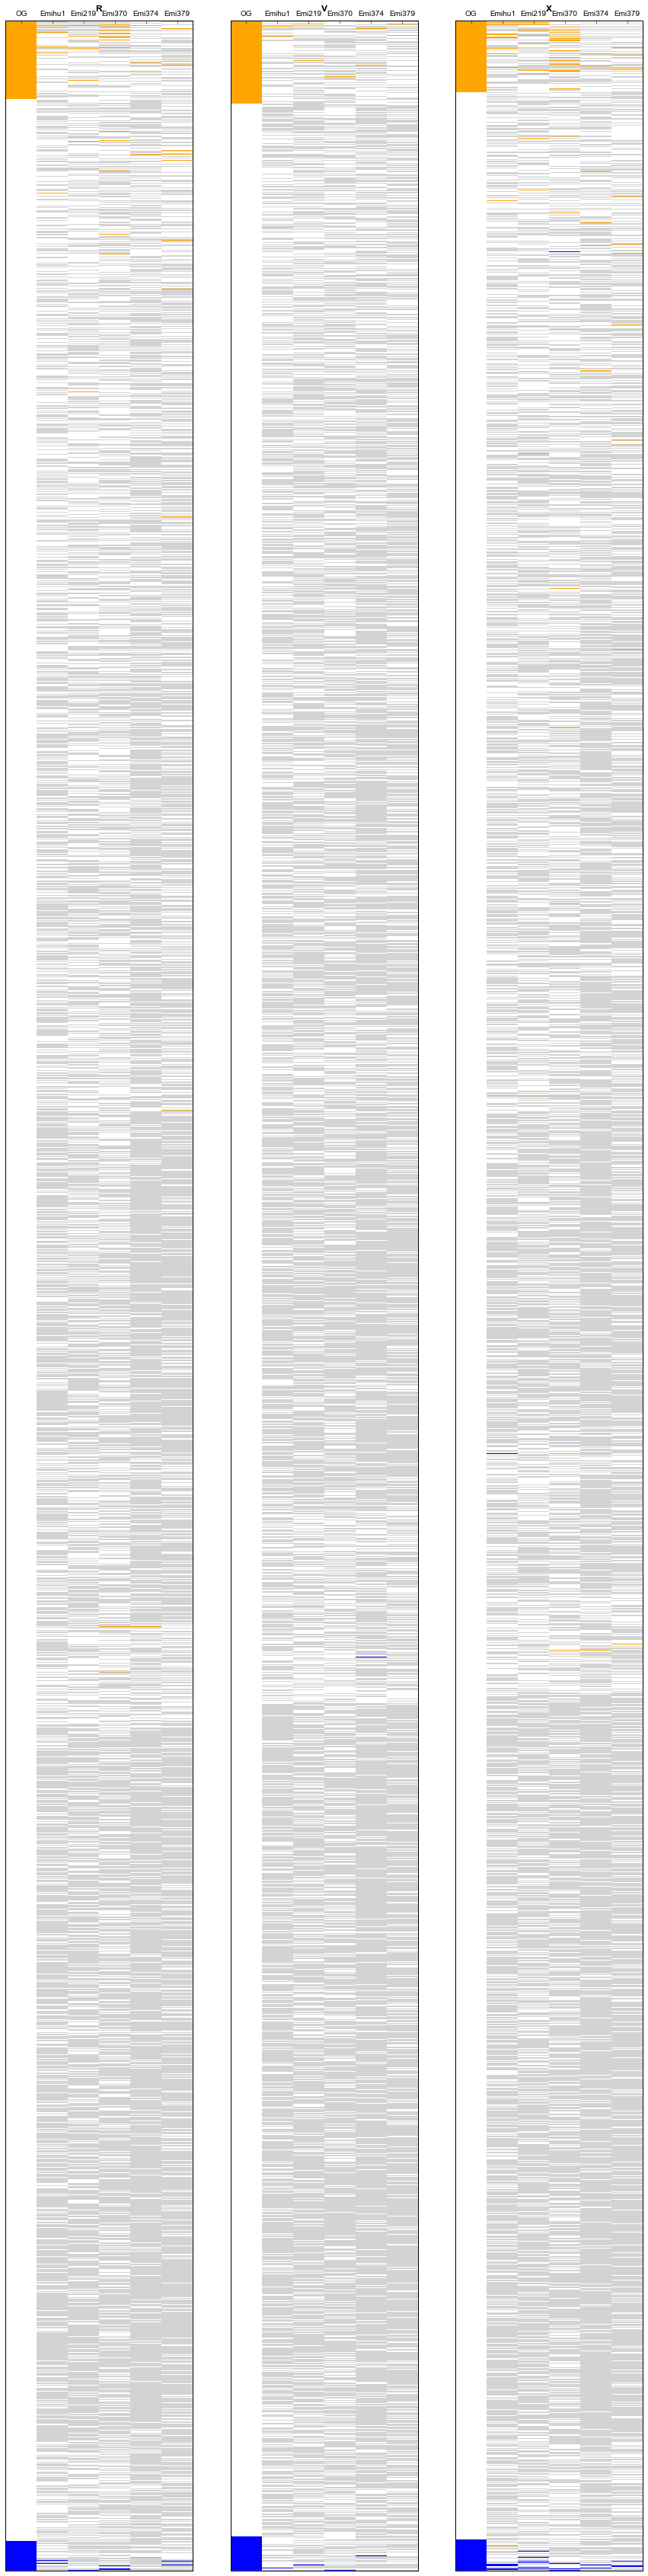

In [18]:
fig, ax=plt.subplots(1,3)
fig.set_size_inches(15, 3000/50)
PlotComparison(QvR_Comp_all, ax[0])
PlotComparison(QvV_Comp_all, ax[1])
PlotComparison(QvX_Comp_all, ax[2])
ax[0].set_title('R', y=1.002,weight='bold')
ax[1].set_title('V',y=1.002, weight='bold')
ax[2].set_title('X',y=1.002, weight='bold')


In [19]:
files=glob.glob("edgeR.18268.dir/*DE_results")
RSEM_Transcript_Hash={}
for f in files:
    name=f.split('.')[5]
    out=pd.read_table(f)
    RSEM_Transcript_Hash[name]=out

In [20]:
test=RSEM_Gene_Hash['Q_con_vs_R_PlusN']

RSEM_Transcript_Stats=pd.DataFrame(index=RSEM_Gene_Hash.keys(), columns=['Total', 'DE'])
for key in RSEM_Transcript_Hash.keys():
    total=len(RSEM_Transcript_Hash[key])
    DE=len(RSEM_Transcript_Hash[key][RSEM_Transcript_Hash[key]['FDR']<0.05])
    RSEM_Transcript_Stats.loc[key,:]=[total, DE]

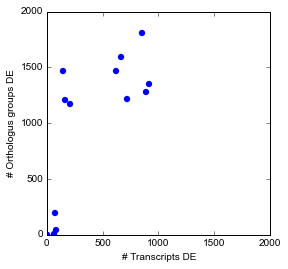

In [21]:
fig,ax=plt.subplots(1)
ax.set_aspect('equal')
ax.scatter(RSEM_Transcript_Stats['DE'], RSEM_Gene_Stats['DE'], lw=0,s=40)
ax.set_xlim([0,2000])
ax.set_ylim([0,2000])
ax.set_xlabel('# Transcripts DE')
ax.set_ylabel('# Orthologus groups DE')

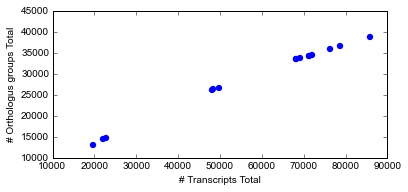

In [22]:
fig,ax=plt.subplots(1)
ax.set_aspect('equal')
ax.scatter(RSEM_Transcript_Stats['Total'], RSEM_Gene_Stats['Total'], lw=0, s=40)
ax.set_xlabel('# Transcripts Total')
ax.set_ylabel('# Orthologus groups Total')

In [23]:
for name in RSEM_Transcript_Stats.index:
    RSEM_Transcript_Stats.loc[name,'Con1']=name.split('_')[0]
    RSEM_Transcript_Stats.loc[name,'Con2']=name.split('_')[3]
    RSEM_Gene_Stats.loc[name,'Con1']=name.split('_')[0]
    RSEM_Gene_Stats.loc[name,'Con2']=name.split('_')[3]

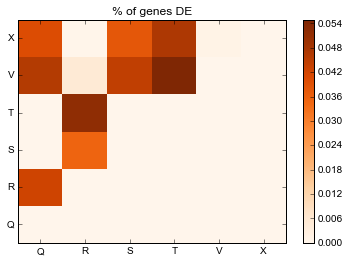

In [24]:
def PlotHeatmap(df,df2=None, ax=None):
    if ax ==None:
        fig,ax = plt.subplots(1)
    exps=['Q','R','S','T','V', 'X']
    hm=pd.DataFrame(index=exps, columns=exps,dtype='float')
#     for i,ex in enumerate(exps):
#         for j,ex2 in enumerate(exps):
#             print df[((df['Con1']==i)&(df['Con2']==j))]
# #             hm.loc[i,j]=
    df=df.sort(['Con1', 'Con2'])
    for i in df.index:
        ci=df.loc[i,'Con1']
        cr=df.loc[i,'Con2']
        hm.loc[cr,ci]=float(df.loc[i,'DE'])/float(df.loc[i,'Total'])
    if df2!=None:

        for i in df2.index:
            cr=df2.loc[i,'Con1']
            ci=df2.loc[i,'Con2']
            hm.loc[cr,ci]=df2.loc[i,'DE']
    hm=hm.astype('float')
    hm=hm.fillna(0)
    cplot=ax.pcolor(hm,cmap=pal.colorbrewer.sequential.Oranges_9.get_mpl_colormap())
    ax.set_xticks(np.arange(0.5,5.6, 1))
    ax.set_yticks(np.arange(0.5,5.6, 1))
    ax.set_yticklabels(exps)
    ax.set_xticklabels(exps)
    cbar=fig.colorbar(cplot)
    ax.set_title('% of genes DE')
PlotHeatmap(RSEM_Gene_Stats)


## Look at the gene content within genes that are DE with N addition

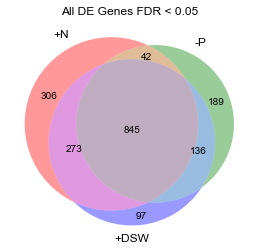

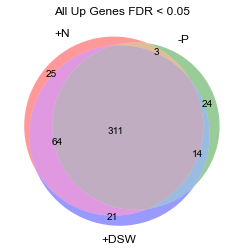

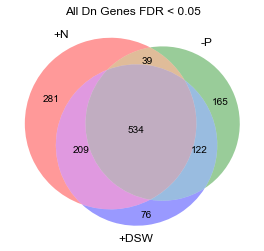

In [26]:
#All differentially regulated genes
from matplotlib_venn import venn3

QR=RSEM_Gene_Hash['Q_con_vs_R_PlusN']
QV=RSEM_Gene_Hash['Q_con_vs_V_MinusP']
QX=RSEM_Gene_Hash['Q_con_vs_X_PlusDSW']

QR_Sig_Set=set(QR[QR.FDR<0.05].index)
QV_Sig_Set=set(QV[QV.FDR<0.05].index)
QX_Sig_Set=set(QX[QX.FDR<0.05].index)

fig,ax=plt.subplots(1)
venn3([QR_Sig_Set, QV_Sig_Set, QX_Sig_Set], set_labels=['+N','-P', '+DSW'],ax=ax)
ax.set_title('All DE Genes FDR < 0.05')

Up_R_Q=set(QR[(QR.FDR<0.05)&(QR.logFC<0)].index)
Up_V_Q=set(QV[(QV.FDR<0.05)&(QV.logFC<0)].index)
Up_X_Q=set(QX[(QX.FDR<0.05)&(QX.logFC<0)].index)

fig,ax=plt.subplots(1)
venn3([Up_R_Q, Up_V_Q, Up_X_Q], set_labels=['+N','-P', '+DSW'])
ax.set_title('All Up Genes FDR < 0.05')


Dn_R_Q=set(QR[(QR.FDR<0.05)&(QR.logFC>0)].index)
Dn_V_Q=set(QV[(QV.FDR<0.05)&(QV.logFC>0)].index)
Dn_X_Q=set(QX[(QX.FDR<0.05)&(QX.logFC>0)].index)

fig,ax=plt.subplots(1)
venn3([Dn_R_Q, Dn_V_Q, Dn_X_Q], set_labels=['+N','-P', '+DSW'])
ax.set_title('All Dn Genes FDR < 0.05')

### Look at distribution of the genes across different functional groups

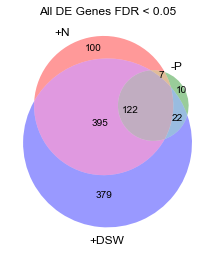

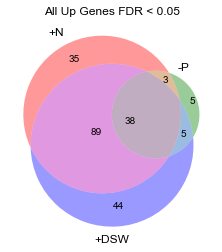

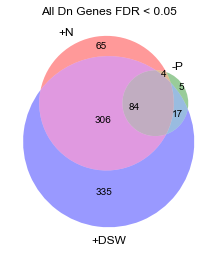

In [27]:
QR=RSEM_Isoform_Hash['Q_con_vs_R_PlusN']
QV=RSEM_Isoform_Hash['Q_con_vs_V_MinusP']
QX=RSEM_Isoform_Hash['Q_con_vs_X_PlusDSW']

QR_Sig_Set=set(QR[QR.FDR<0.05].index)
QV_Sig_Set=set(QV[QV.FDR<0.05].index)
QX_Sig_Set=set(QX[QX.FDR<0.05].index)

fig,ax=plt.subplots(1)
venn3([QR_Sig_Set, QV_Sig_Set, QX_Sig_Set], set_labels=['+N','-P', '+DSW'],ax=ax)
ax.set_title('All DE Genes FDR < 0.05')

Up_R_Q=set(QR[(QR.FDR<0.05)&(QR.logFC<0)].index)
Up_V_Q=set(QV[(QV.FDR<0.05)&(QV.logFC<0)].index)
Up_X_Q=set(QX[(QX.FDR<0.05)&(QX.logFC<0)].index)

fig,ax=plt.subplots(1)
venn3([Up_R_Q, Up_V_Q, Up_X_Q], set_labels=['+N','-P', '+DSW'])
ax.set_title('All Up Genes FDR < 0.05')

Dn_R_Q=set(QR[(QR.FDR<0.05)&(QR.logFC>0)].index)
Dn_V_Q=set(QV[(QV.FDR<0.05)&(QV.logFC>0)].index)
Dn_X_Q=set(QX[(QX.FDR<0.05)&(QX.logFC>0)].index)

fig,ax=plt.subplots(1)
venn3([Dn_R_Q, Dn_V_Q, Dn_X_Q], set_labels=['+N','-P', '+DSW'])
ax.set_title('All Dn Genes FDR < 0.05')

## Targeting P and N genes

Using the genome strain N/P genes as a basis for these analyses



In [28]:
def invertDict(inhash):
    #Invert the key/value pairs in a dictionary
    outhash={}
    for key in inhash:
        for value in inhash[key]:
            outhash[value]=key
    return outhash
Genes_Uniq_Venn_inv=invertDict(Genes_Uniq_Venn)
gFHash_inv=invertDict(gFHash)

In [36]:
def importGeneList(infile):
    handle=open(infile, 'rw')
    outList=[]
    for line in handle:
        geneName="Emihu1|"+line.strip()
        outList.append(geneName)
    outSet=set(outList)
    return outSet

Pgenes=importGeneList("McKewGenesTargets/Phosphate.tab")
Ngenes=importGeneList("McKewGenesTargets/Nitrogen.tab")
Ureagenes=importGeneList("McKewGenesTargets/UreaCycle.tab")
VitaminGenes=importGeneList("McKewGenesTargets/Vitamin.tab")
Sgenes=importGeneList("McKewGenesTargets/Suphur.tab")
Calgenes=importGeneList("McKewGenesTargets/Calcification.tab")
AminoAcid=importGeneList("McKewGenesTargets/AminoAcid.tab")



In [102]:
def geneSetToOGDict(GeneList):
    #Get the OG associated with each of the EmiHu1 genes listed
    OGList=[]
    for p in GeneList:  
        if p in gFHash_inv:
            OG=gFHash_inv[p]
        print OG,'\t',p 

geneSetToOGDict(Ureagenes)

OG1_5_4596 	Emihu1|434747
OG1_5_5714 	Emihu1|423772
OG1_5_1089 	Emihu1|422007
OG1_5_14076 	Emihu1|102483
OG1_5_3365 	Emihu1|465437
OG1_5_3365 	Emihu1|456474
OG1_5_14076 	Emihu1|240308
OG1_5_1089 	Emihu1|463837
OG1_5_2699 	Emihu1|204139
OG1_5_3099 	Emihu1|441299


In [122]:
def geneSetToOG(GeneList):
    #Get the OG associated with each of the EmiHu1 genes listed
    OGList=[]
    for p in GeneList:   
        if p in gFHash_inv:

            OG=gFHash_inv[p]
            OGList.append(OG)
    OGSet=set(OGList)
    return OGSet

def PlotComparison_GeneSet(ComparisonOGIsoSig,ax, GeneList):
    #Create a heat map for the significance of regulation for each of the OG and look at the relative regulation in the various strains
    OGSet=geneSetToOG(GeneList)
    df=ComparisonOGIsoSig.loc[OGSet]
    #make it easier for yourself and grab the Emihu genome reads. 
    EmiNameList=[]
    for i in df.index:
        out=[x for x in gFHash[i] if 'Emihu1' in x]
        if out:
            EmiNameList.append(out[0])
        else: 
            EmiNameList.append('NaN')
    df2=df.copy()
    df2['EmiName']=EmiNameList
    df=df.fillna(-2)
    ax.margins(0,0)
    cmap = colors.ListedColormap(['lightgrey', 'blue', 'white', 'orange'])
    ax.imshow(df, interpolation='none', aspect='auto', origin='upper', cmap=cmap, vmin=-2, vmax=1)
    ax.set_xticks(np.arange(0, len(df.columns), 1))
    ax.set_xticklabels(df.columns, rotation=90)
    ax.xaxis.set_ticks_position('top')
    ax.set_yticks([])
    return df2

def PlotTriptic(GeneSet, fig,ax):
    
    QvR=PlotComparison_GeneSet(QvR_Comp_all,ax[0], GeneSet)
    QvV=PlotComparison_GeneSet(QvV_Comp_all,ax[1], GeneSet)
    QvX=PlotComparison_GeneSet(QvX_Comp_all,ax[2], GeneSet)
    fig.set_size_inches(len(QvR.columns)*2, len(QvR.index)/3)
    ax[2].yaxis.tick_right()
    ax[2].set_yticks(np.arange(0, len(QvR.index), 1))
    ax[2].set_yticklabels(QvR.index, size='large')
    ax[0].set_yticks(np.arange(0, len(QvR.index), 1))
    ax[0].set_yticklabels(QvR.EmiName,size='large')
    ax[0].set_title('+N', y=1.03,weight='bold')
    ax[1].set_title('-P',y=1.03, weight='bold')
    ax[2].set_title('+DSW',y=1.03, weight='bold')
    return {'QvR':QvR, 'QvV':QvV, 'QvX':QvX}



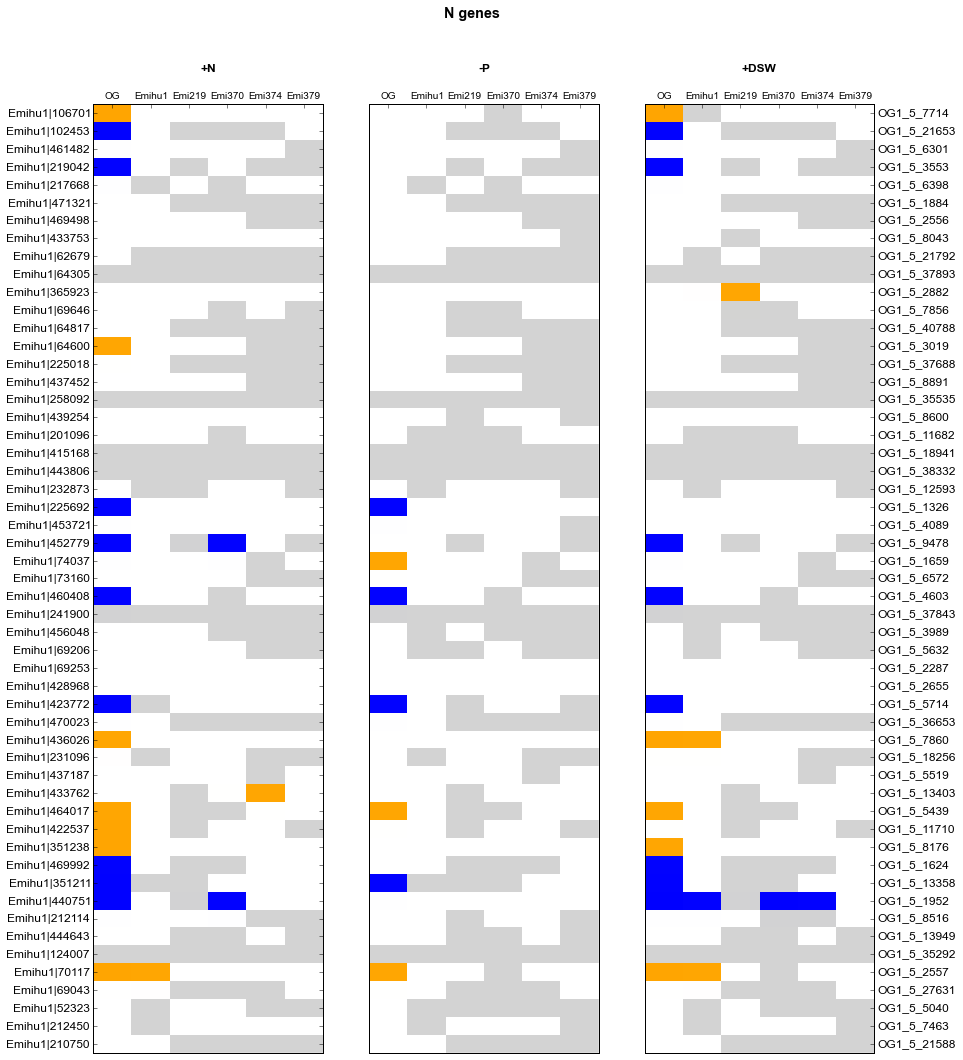

In [105]:
figN,ax=plt.subplots(1,3)
QvAll_N=PlotTriptic(Ngenes, figN, ax)
figN.suptitle('N genes', weight='bold', fontsize='x-large')

## N-related genes

### Up in +N, -P, or DSW : 
- similar to cystathionine beta lyase
- Putative formate/nitrite transporter 
- glutamine synthetase type III  
- Ammonium transporter (AMT4)
- One of four component proteins of the enzyme glycine decarboxylase. (GDCT1)
- Cytochrome b5
- Ammonium transporter (AMT2)
- Glu/Leu/Phe/Val dehydrogenase (Only in Emi374)
- Putative ammonium transporter (Only in -P) (AMT9)
- putative phosphoserine phosphatase serB

### Down in +N, -P, or DSW : 
- Putative urea transporter (DUR3)
- acetyl-CoA carboxylase hypothetical
- Acetamidase/Formamidase
- Urease (URE2)
- Nitrate transporter (NRT1)
- Putative ammonium transporter (AMT15)
- ferredoxin-dependent glutamate synthase
- Acetamidase/Formamidase
- Amidases / Nitrogenase / indole acetamide hydrolase (?? 102453)


From Rokitta: 
The effects of N-limitation on the haploid metabolism shared common features with the diplont response, e.g., the down-regulation of the synthesis of key amino acids, purines and pyrimidines. The OUC was, like in the diploid stage, down-regulated in key reactions (carbamoylphosphate synthase GJ11368, GJ00711; ornithine transporter GJ27211; argininosuccinate synthase GJ01516) and also in peripheral reactions that divert intermediates towards proline or polyamine synthesis (ornithine aminotransferase GJ00647; ornithine decarboxylase GJ06908). These regulation patterns indicate that the haploid stage applies the same biochemical strategy of using OUC cycle intermediates and their derivatives as a cellular backup for N.

Clearly visible in the haploid stage was the down-regulation of the plastidary GS-GOGAT system, which conventionally assimilates inorganic N (glutamine-synthetase GJ00014, GJ09184, GJ12379; glutamate-synthase GJ12602), as well as the machinery for assimilation of oxidized inorganic nitrogen sources (NO2− transporter GJ07216; NO3− transporter GJ16902, GJ15318, GJ00825; NO2− reductase GJ21771, GJ00725; NO3− reductase GJ04471, GJ23958, GJ09099). The down-regulation of NO3− reductase under N-limitation has been observed earlier in diploid E. huxleyi cultures [29,52] and in N-limited diatoms [31], and has been attributed to a substrate-sensing regulatory system that enables transcription of NO3− related genes only in the presence of NO3−[53]. Unlike the diplont, the haploid stage did not induce an ATP-driven cytoplasmic glutamate amination to salvage NH4+ liberated from internal amino acid turnover. Likewise, no expression changes in the machinery for the uptake of dissolved (in)organic N was seen in the haplont. One explanation may be that salvaging of dissolved (in)organic nitrogenous compounds may be constitutively expressed in the haploid stage, so that no expression changes could be seen.

The obtained transcriptomic data well support the flux modes of N through protistan metabolism as they were previously hypothesized by [30] and [31]. Also in E. huxleyi, the OUC appears to be a distributional hub for N that balances carbon assimilation and breakdown with available cellular nitrogen budgets. This balancing may be achieved because N and C metabolism rely on and respond to common substrates [31,32,55]. The presence of OUC genes also in dinoflagellates [33] suggests that the described metabolic responses satisfy biochemical requirements which are generally imposed on eukaryotic cells in nutrient-scarce environments. Here we show the first evidence that E. huxleyi applies an MQO, an interesting genetic feature among eukaryotic phytoplankton, which seems to enable organisms to drive efficient ATP synthesis with reduced respiratory carbon loss. This enzyme might contribute to E. huxleyi’s ability to inhabit very divergent environments [7,8,56]. The profound regulation patterns we observed in response to N limitation are not recognizable in the response to sulfate deficiency as presented by Bochenek et al. [57]. Under sulfate deprivation, cell division was slowed down, but growth in terms of biomass production was still high, as can be derived from the strongly increased cell volumes. This may be the reason why under sulfate deficiency there was no indication of a comparable large-scale metabolic re-configurations as seen under N-limitation.

The haploid cells, which might function as a ‘seeding population’ in the aftermath of viral bloom termination [17], showed less transcriptomic responses globally, which paralleled the lower increase in particulate C:N ratio under N-limitation in haploid compared to diploid cells (Additional file 2: Figure S2). Haploid cells apparently did not specifically regulate genes for scavenging external N sources when confronted with N-limitation. This may either be due to a constitutive expression of N scavenging machinery or perhaps because the haplont does not rely on these genes at all, being more adapted for ‘post-bloom’ environments, in which waters may contain higher amounts of organic nutrients released from decaying phytoplankton. As both life-cycle stages appear to have mixotrophic capacities [19], in the hypothesized natural scenario, haplonts might generally be able to rely more on external dissolved or particulate sources of N. These diverging morphological and physiological properties support the notion that the stages are specialized to occupy distinct ecological niches.



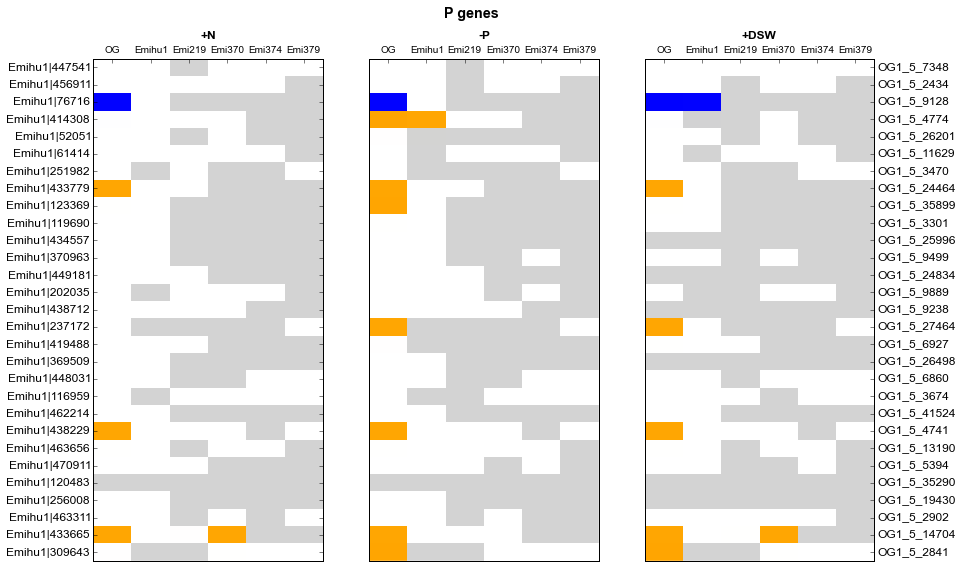

In [72]:
figP,ax=plt.subplots(1,3)
QvAll_P=PlotTriptic(Pgenes, figP, ax)
figP.suptitle('P genes', weight='bold', fontsize='x-large')

## P-related genes

### Up in +N, -P, or DSW : 
- Alkaline phosphatase 1 (only in -P)
- Glycerophosphoryl diester phosphodiesterase (all)
- phosphate repressible phosphate permease (only in -P)
- Putative 5'-nucleotidase (only in -P, DSW)
- SPX, N-terminal (all)
- Putative alternative oxidase
- Glycerophosphoryl diester phosphodiesterase (only -P)

###Down in +N, -P, or DSW:
- Plasma membrane H+-transporting ATPase	


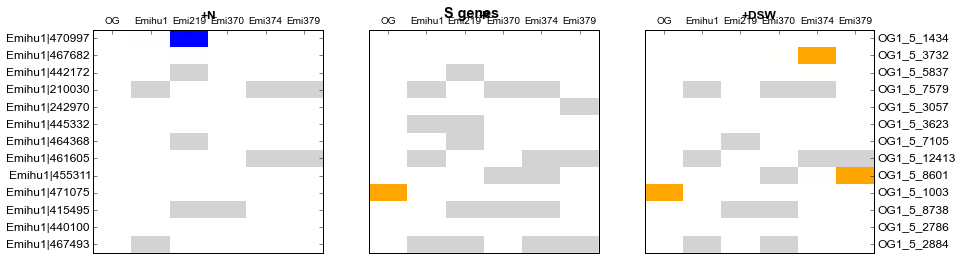

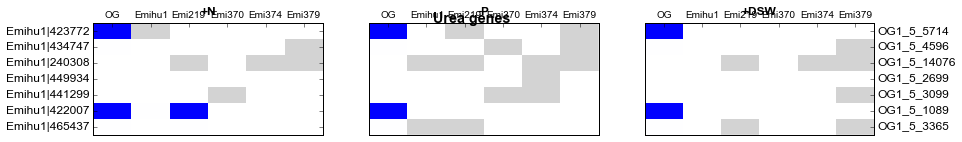

In [61]:
figS,ax=plt.subplots(1,3)
QvAll_S=PlotTriptic(Sgenes, figS, ax)
figS.suptitle('S genes', weight='bold', fontsize='x-large')

figU,ax=plt.subplots(1,3)
QvAll_U=PlotTriptic(Ureagenes, figU, ax)
figU.suptitle('Urea genes', weight='bold', fontsize='x-large')



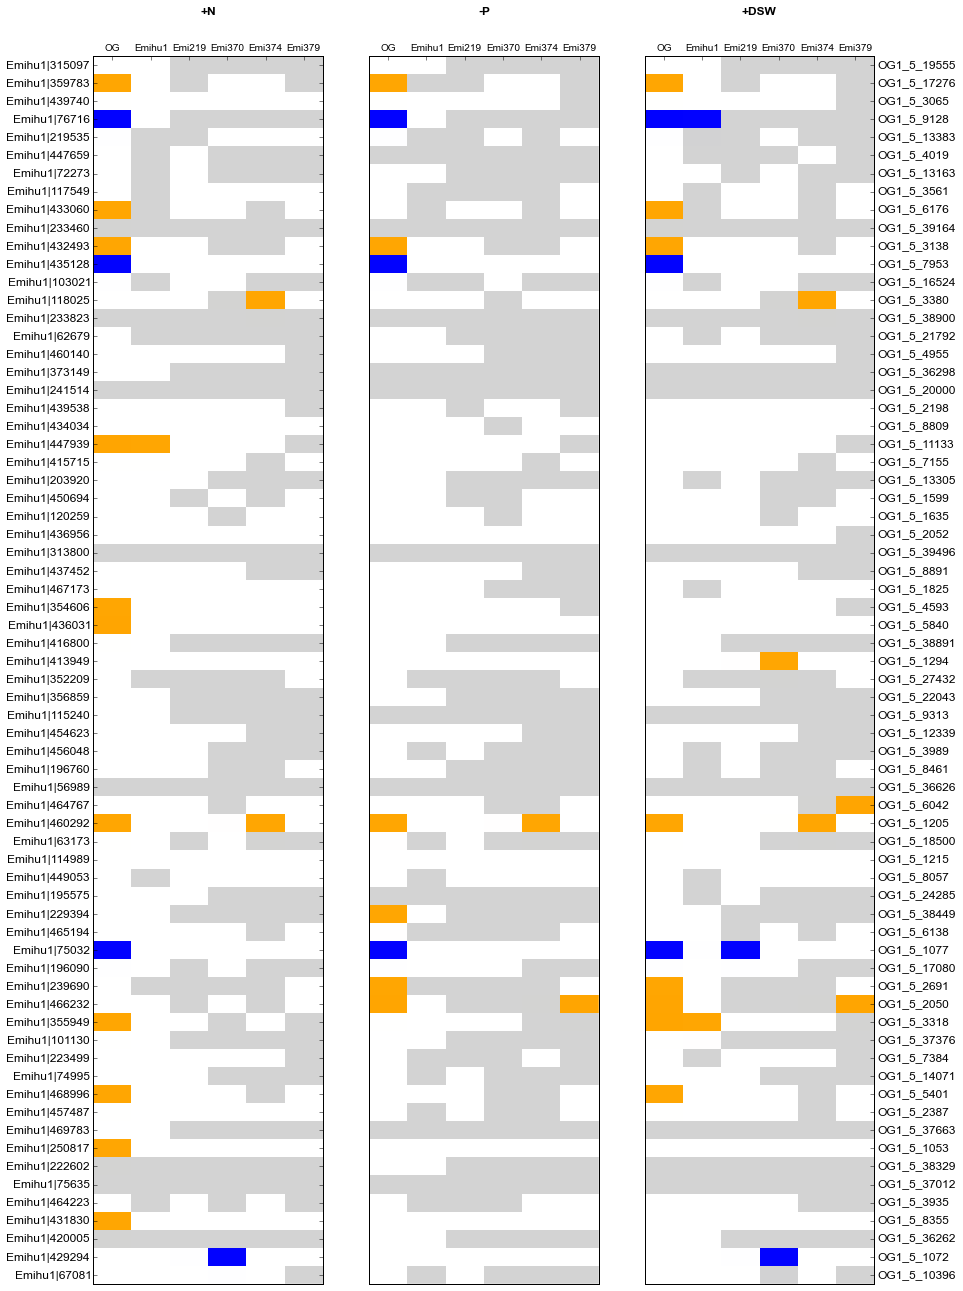

In [62]:
Calgenes=importGeneList("McKewGenesTargets/Calcification.tab")

figC,ax=plt.subplots(1,3)
QvAll_C=PlotTriptic(Calgenes, figC, ax)


##Calcification-related genes

### Up in +N, -P, or DSW : 
- subunit of Vo sector of a vacuolar H+-ATPase
- V-ATPase, E
- carbonic anhydrase, gamma
- K+-dependent Na+/Ca2+ exchanger (NCKX2; NCKX family)
- Sodium/calcium exchanger protein
- carbonic anhydrase, delta
- Ca2+/Mg2+-permeable cation channels (LTRPC family)
- 	V-ATPase, G
- four domain voltage-gated Ca2+ channels	 
- Ca2+/Mg2+-permeable cation channels transient receptor potential
- GPA (glutamic acid, proline and alanine) unknown, calcium binding
- carbonic anhydrase, delta
- carbonic anhydrase, beta
- anion exchanger-like, SLC4 Na+ independent Cl−/HCO3− exchangers


### Down in +N, -P, or DSW:
- calcium pump (only in one species-- not at the OG level)
- H+ PPase
- V-ATPase, B
- calcium pump



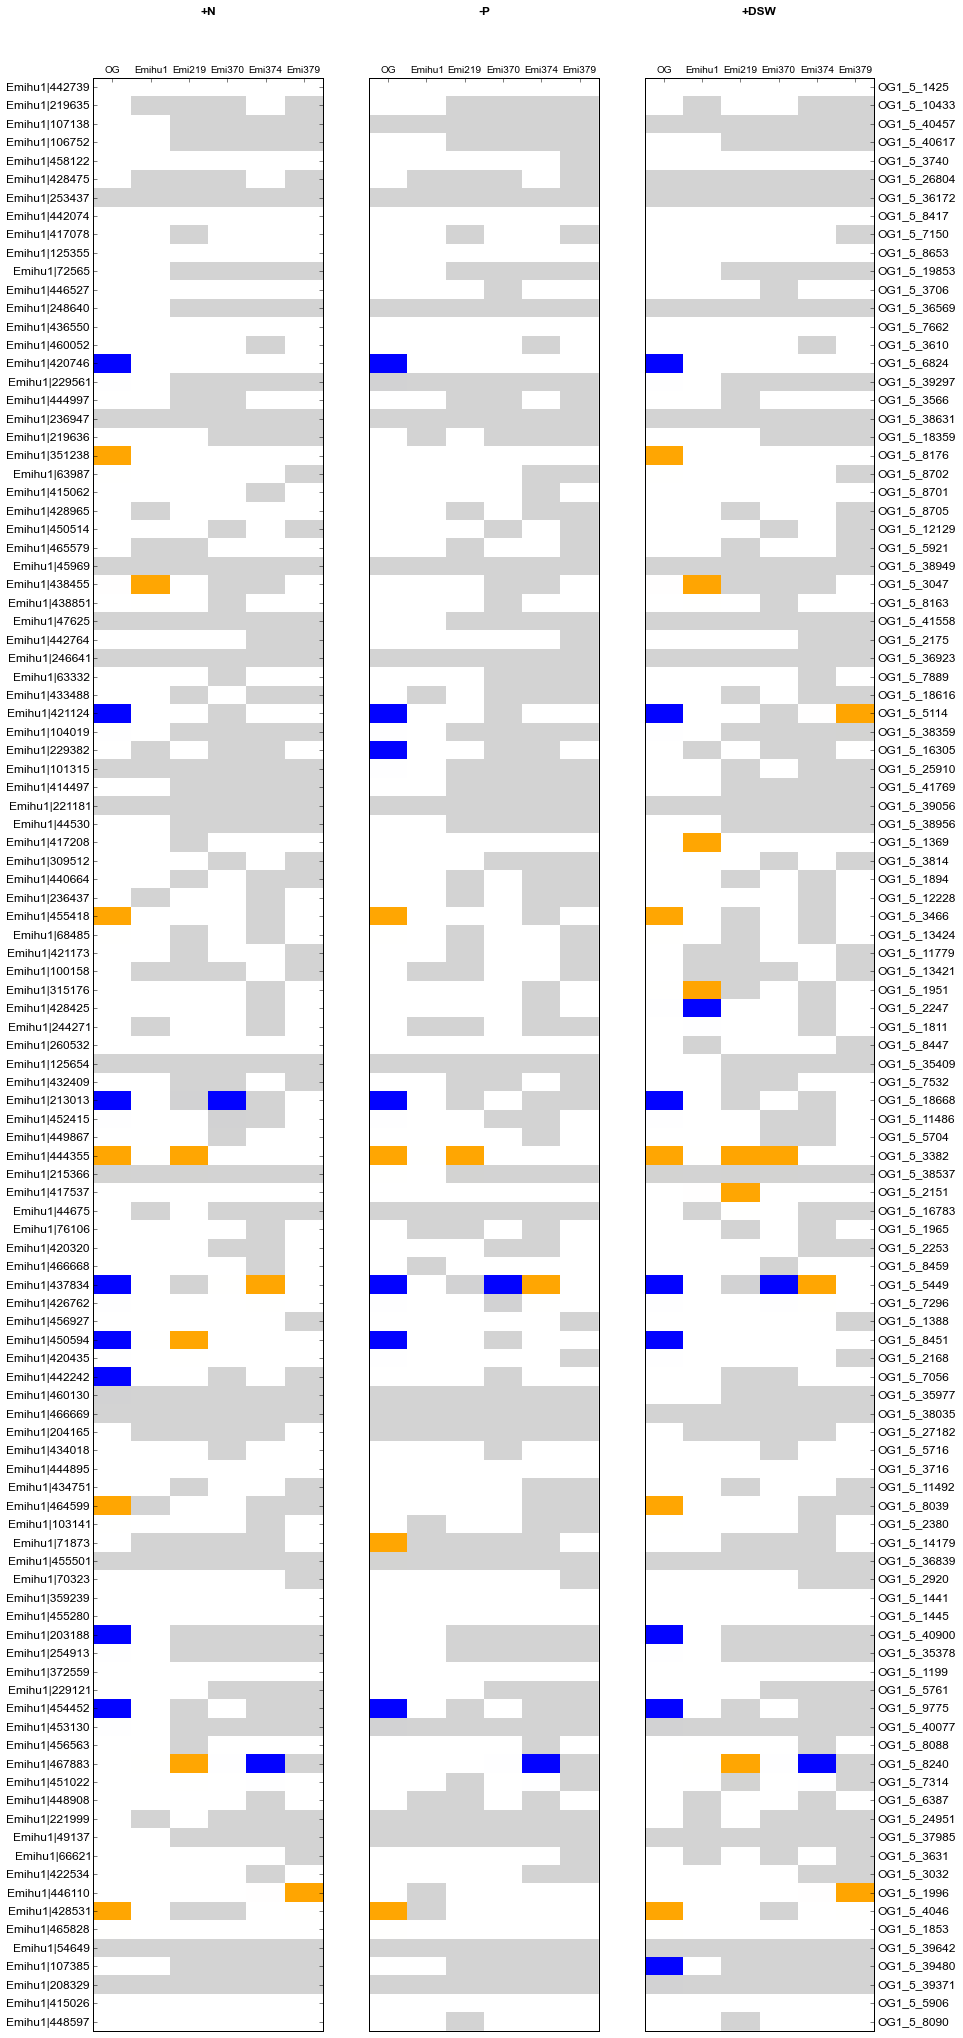

In [110]:
Cargenes=importGeneList("McKewGenesTargets/CarbonCycle.tab")

figCar,ax=plt.subplots(1,3)
QvAll_Car=PlotTriptic(Cargenes, figCar, ax)


## Carbon-related genes

### Up in +N, -P, or DSW : 
- similar to cystathionine beta lyase
- Putative formate/nitrite transporter 
- glutamine synthetase type III  
- Ammonium transporter (AMT4)
- One of four component proteins of the enzyme glycine decarboxylase. (GDCT1)
- Cytochrome b5
- Ammonium transporter (AMT2)
- Glu/Leu/Phe/Val dehydrogenase (Only in Emi374)
- Putative ammonium transporter (Only in -P) (AMT9)
- putative phosphoserine phosphatase serB

### Down in +N, -P, or DSW : 
- Enolase 
- Plastidic glyceraldehyde 3-phosphate dehydrogenase
- Isocitrate dehydrogenase (-P only)
- Enolase1
- Glyceraldehyde 3-phosphate dehydrogenase
- 	isocitrate dehydrogenase, NADP-dependent
- 	sedoheptulose-1,7-bisphosphatase (chloroplast?)
- Fructose-1,6-bisphosphate aldolase class II (EC:4.1.2.13), prokaryotic origi
- Enolase2
- 	Phosphoglycerate kinase rpobably plastid targeted 
- 	citrate synthase, mitochondrial (up in one organism... down in another???)467883


### From Rokitta N-lim transcriptome study
<img src="McKewGenesTargets/Rokitta_Carbon.jpg">


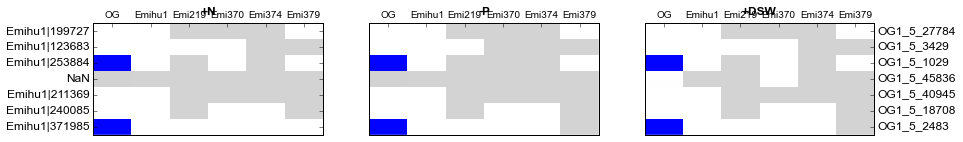

In [123]:
Hapgenes=importGeneList("McKewGenesTargets/HaploidSpecific.tab")
Hapgenes.add('Emi370|CAMPEP_0187660036')
Hapgenes.add('Emi379|CAMPEP_0187613134')
figHap,ax=plt.subplots(1,3)
QvAll_Hap=PlotTriptic(Hapgenes, figHap, ax)


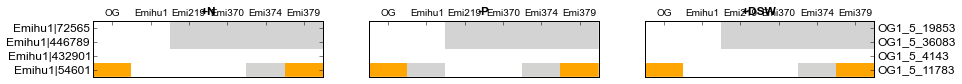

In [132]:
Virgenes=importGeneList("McKewGenesTargets/ViralTargets.tab")
for i in open("McKewGenesTargets/ViralTargets_Other.tab", 'r'):
    Virgenes.add(i)
figVir,ax=plt.subplots(1,3)
QvAll_Vir=PlotTriptic(Virgenes, figVir, ax)


In [130]:
gFHash[gFHash_inv['Emihu1|54601']]

['Emi379|CAMPEP_0187644476',
 'Emi370|CAMPEP_0187677576',
 'Emi219|CAMPEP_0187747848',
 'Emihu1|54601']

"it seems probable that nitrogen starvation induced syngamy, resulting in (diploid) C-cells in their cultures."
"Especially the diploid stage induces machinery to scavenge external (in)organic nitrogenous compounds (blue shade)."

In [ ]:
def ParseOG(inhash):
    #Loop through a given hash of genes and determine where it falls by group via the defined orthologus gene hash 
    OG_InSet={}
    OG_InList={}
    for og in inhash:
        s=Genes_Uniq_Venn_inv[og]
        if s in OG_InSet.keys():
            OG_InSet[s]+=1
            OG_InList[s].append(og)
        else: 
            OG_InSet[s]=1
            OG_InList[s]=[og]
    out_PD=pd.DataFrame.from_dict(OG_InSet,orient='index')
    out_PD=out_PD/out_PD.sum()
    xs=out_PD.index
    xs=list(xs)
    xs.sort()
    xs.sort(key = lambda s: len(s), reverse=True)
    out_PD=out_PD.loc[xs]
    #returns panda dict with relative percentages of representation and a hash of OGs in each of the groupings
    return (out_PD, OG_InList)

Sig_By_EhxVen, Sig_OGInList=ParseOG((QR_Sig_Set.intersection(QV_Sig_Set)).intersection(QX_Sig_Set))
Up_By_EhxVen, Up_OGInList=ParseOG((Up_R_Q.intersection(Up_V_Q)).intersection(Up_X_Q))
Dn_By_EhxVen, Dn_OGInList=ParseOG((Dn_R_Q.intersection(Dn_V_Q)).intersection(Dn_X_Q))
Dn_union_By_EhxVen, Dn_union_OGInList=ParseOG((Dn_R_Q.union(Dn_V_Q)).union(Dn_X_Q))

Sig_By_EhxVen.plot(kind='bar', legend=False, title='DE Genes by group', ylim=[0,0.5])
Up_By_EhxVen.plot(kind='bar', legend=False, title='Up Genes by group', ylim=[0,0.5])
Dn_By_EhxVen.plot(kind='bar', legend=False, title='Dn Genes by group', ylim=[0,0.5])


In [ ]:


Dn_OGInList_genes={}
c=0
for OG in Dn_OGInList[('Emi219', 'Emi370', 'Emi374', 'Emi379', 'Emihu1')]:
    c+=1
    geneList=OG_to_Gene_Dict[OG]
    matching = [s for s in geneList if "Emihu1" in s]
    UP_R_Unique_Genes[OG]=matching
    print OG,';', ' '.join(UP_R_Unique_Genes[OG])
print c

In [ ]:
UP_Unique_Genes={}
for OG in Up_OGInList[('Emi219', 'Emi370', 'Emi374', 'Emi379', 'Emihu1')]:
    geneList=OG_to_Gene_Dict[OG]
    matching = [s for s in geneList if "Emihu1" in s]
    UP_Unique_Genes[OG]=matching

In [ ]:
#write out the upregulated genes that are common to all strains. 
fout=open('OG_Upregulated_AllStrains_Emihu1.tab','w')
for key in UP_Unique_Genes.keys():
    fout.write(key)
    fout.write('\t')
    fout.write(' '.join(UP_Unique_Genes[key]))
    fout.write('\n')

fout.close()

In [ ]:
KAAS_Hash={}
for line in open('../TranscriptomeAnnotation/KAAS_Ehux_Protein_Annotation.tab', 'r'):
    line=line.split()
    if len(line)>1:
        KAAS_Hash[line[0].strip()]=line[1].strip()
    else:
        KAAS_Hash[line[0].strip()]=None

        
#Relate KEGG to OGs
newOG_KEGGHash={}
for gene in gFHash:
    newOG_KEGGHash[gene]=[]
    for transcript in gFHash[gene]:
        kegg=KAAS_Hash[transcript]
        if kegg in newOG_KEGGHash[gene]:
            pass
        elif kegg==None:
            pass
        else: 
            newOG_KEGGHash[gene].append(kegg)#


#Read in ko00002 table
Kegg_masterDict_ko0002={}
file=open('../TranscriptomeAnnotation/ko00002_table.tab', 'r')
header=next(file)
header= header.split('\t')
for l in file:
    line=l.split('\t')
    kegg=line[0]
    a={}
    for i,e in enumerate(line):
        a[header[i]]=e
    Kegg_masterDict_ko0002[kegg]=a


In [ ]:
#Look at the KEGG ID of Up_Intersection
Up_Intersection=(Up_R_Q.intersection(Up_V_Q)).intersection(Up_X_Q)
UP_KEGG=[]

for OG in Up_Intersection:
    if OG in newOG_KEGGHash.keys():
        UP_KEGG.append(newOG_KEGGHash[OG])
        
UP_KEGG=[item for sublist in UP_KEGG for item in sublist]


Dn_Intersection=(Dn_R_Q.intersection(Dn_V_Q)).intersection(Dn_X_Q)
DN_KEGG=[]

for OG in Dn_Intersection:
    if OG in newOG_KEGGHash.keys():
        DN_KEGG.append(newOG_KEGGHash[OG])
        
DN_KEGG=[item for sublist in DN_KEGG for item in sublist]

In [ ]:
#Read in KOG table and create a dictionary of dictionaries to describe all the data. 
KOG_MasterDict={}
file=open('../TranscriptomeAnnotation/KOG/output/output.2', 'r')
header=next(file)
header= header.split('\t')
for l in file:
    line=l.split('\t')
    PID=line[0]
    a={}
    for i,e in enumerate(line):
        a[header[i].strip()]=e.strip()
    KOG_MasterDict[PID]=a
KOG_MasterDict

##Create a pandas DF from the master dict and adjust it

KOG_MasterPD=pd.DataFrame.from_dict(KOG_MasterDict, orient='columns').T

In [ ]:
def invert(d):
    return dict( (v,k) for k in d for v in d[k] )
    
gFHash_inverted=invert(gFHash)

KOG_MasterPD=KOG_MasterPD.loc[gFHash_inverted.keys()]
KOG_MasterPD['Organism']=[item.split('|')[0] for item in KOG_MasterPD.index]
KOG_MasterPD['OrthoMCLGroups']=KOG_MasterPD['#Query'].map(gFHash_inverted)
KOG_MasterPD=KOG_MasterPD.dropna()


In [ ]:
fig,ax=plt.subplots(1)
fig.set_size_inches(10,8)
KOG_MasterPD_OG=KOG_MasterPD.set_index('OrthoMCLGroups')
UpGenes_KOG=KOG_MasterPD_OG.loc[Up_Intersection].dropna()
UP_KOG_Class=UpGenes_KOG.groupby('class').size()
for ind in UP_KOG_Class.index:
    if len(ind)>1:
        UP_KOG_Class=UP_KOG_Class.drop(ind)
        

DnGenes_KOG=KOG_MasterPD_OG.loc[Dn_Intersection].dropna()
DN_KOG_Class=DnGenes_KOG.groupby('class').size()
for ind in DN_KOG_Class.index:
    if len(ind)>1:
        DN_KOG_Class=DN_KOG_Class.drop(ind)
        
DE_Reg_Intersetion=pd.DataFrame(UP_KOG_Class,columns=['UP'])
DE_Reg_Intersetion['DN']=DN_KOG_Class

DE_Reg_Intersetion.plot(kind='bar', lw=0,
                        colormap=pal.colorbrewer.diverging.PRGn_4.get_mpl_colormap(), ax=ax, grid=False)

In [ ]:
py.sign_in('halexand', 'ox16mvkj4g')

In [ ]:
import plotly.plotly as py
from plotly.graph_objs import *
df = RSEM_Gene_Hash['Q_con_vs_R_PlusN']
df = df.join(KOG_MasterPD.set_index('OrthoMCLGroups'), how='outer')

dn = df.logFC < 0
up = df.logFC > 0 
sig = df.FDR < 0.05

PDSigUp = df[up & sig]
PDSigDn = df[dn & sig]

df.head(2)

fig = {
    'data': [
  		{
  			'x': PDSigUp.logCPM , 
        	'y': PDSigUp.logFC, 
        	'text': PDSigUp.index + ': ' + PDSigUp.description, 
        	'mode': 'markers', 
        	'name': 'UP Regulated'},
        {
        	'x': PDSigDn.logCPM, 
        	'y': PDSigDn.logFC, 
        	'text': PDSigDn.index + ': ' + PDSigDn.description, 
        	'mode': 'markers', 
        	'name': 'DN Regulated'}
    ],
    'layout': {
        'xaxis': {'title': 'logCPM'},
        'yaxis': {'title': "logFC"}
    }
}

# IPython notebook
py.iplot(fig, filename='QvR_KOGFunctionOverlay')

In [ ]:
import plotly.plotly as py
from plotly.graph_objs import *
df = RSEM_Gene_Hash['Q_con_vs_V_MinusP']
df = df.join(KOG_MasterPD.set_index('OrthoMCLGroups'), how='outer')

dn = df.logFC < 0
up = df.logFC > 0 
sig = df.FDR < 0.05

PDSigUp = df[up & sig]
PDSigDn = df[dn & sig]

df.head(2)

fig = {
    'data': [
  		{
  			'x': PDSigUp.logCPM , 
        	'y': PDSigUp.logFC, 
        	'text': PDSigUp.index + ': ' + PDSigUp.description, 
        	'mode': 'markers', 
        	'name': 'UP Regulated'},
        {
        	'x': PDSigDn.logCPM, 
        	'y': PDSigDn.logFC, 
        	'text': PDSigDn.index + ': ' + PDSigDn.description, 
        	'mode': 'markers', 
        	'name': 'DN Regulated'}
    ],
    'layout': {
        'xaxis': {'title': 'logCPM'},
        'yaxis': {'title': "logFC"}
    }
}

# IPython notebook
py.iplot(fig, filename='QvV_KOGFunctionOverlay')

In [ ]:
import plotly.plotly as py
from plotly.graph_objs import *
df = RSEM_Gene_Hash['Q_con_vs_R_PlusN']
df = df.join(KOG_MasterPD.set_index('OrthoMCLGroups'), how='outer')

dn = df.logFC < 0
up = df.logFC > 0 
sig = df.FDR < 0.05

PDSigUp = df[up & sig]
PDSigDn = df[dn & sig]

df.head(2)

fig = {
    'data': [
  		{
  			'x': PDSigUp.logCPM , 
        	'y': PDSigUp.logFC, 
        	'text': PDSigUp.index + ': ' + PDSigUp.description, 
        	'mode': 'markers', 
        	'name': 'UP Regulated'},
        {
        	'x': PDSigDn.logCPM, 
        	'y': PDSigDn.logFC, 
        	'text': PDSigDn.index + ': ' + PDSigDn.description, 
        	'mode': 'markers', 
        	'name': 'DN Regulated'}
    ],
    'layout': {
        'xaxis': {'title': 'logCPM'},
        'yaxis': {'title': "logFC"}
    }
}

# IPython notebook
py.iplot(fig, filename='QvX_KOGFunctionOverlay')